In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
df= pd.read_excel("bangla dataset.xlsx")
df.head(40)

,Comment,Category,Gender,comment react number,label,Tag
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1,sexual,Negative
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2,not bully,Neutral
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2,not bully,Neutral
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0,not bully,Positive
4,পটকা মাছ,Politician,Male,0,troll,Negative
5,অন্যরকম .. ভালো লাগলো ..❤️,Singer,Male,1,not bully,Positive
6,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,Actor,Female,9,troll,Negative
7,মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...,Actor,Female,0,not bully,Positive
8,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,Actor,Female,4,religious,Neutral
9,"হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে।",Social,Male,0,not bully,Positive


In [ ]:
data = df.drop(columns = ['Gender','Category','comment react number','label'])

In [ ]:
data

,Comment,Tag,cleaned,length
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Negative,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,33
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Neutral,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছি...,9
2,"অরে বাবা, এই টা কোন পাগল????",Neutral,অরে বাবা এই টা কোন পাগল,6
3,ক্যাপ্টেন অফ বাংলাদেশ,Positive,ক্যাপ্টেন অফ বাংলাদেশ,3
4,পটকা মাছ,Negative,পটকা মাছ,2
5,অন্যরকম .. ভালো লাগলো ..❤️,Positive,অন্যরকম ভালো লাগলো,3
6,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,Negative,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,45
7,মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...,Positive,মোহাম্মদ কফিল উদ্দীন মাহমুদ ...,4
8,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,Neutral,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,22
9,"হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে।",Positive,হিরো আলম তুমি এগিয়ে চলো আমরা আছি তোমার সাথে,9


In [ ]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Tag =='Positive']),
      "\nTotal Negative Reviews:",len(data[data.Tag=='Negative']),
      "\nTotal Neutral Reviews:",len(data[data.Tag =='Neutral']))

Total Reviews: 50 
Total Positive Reviews: 20 
Total Negative Reviews: 19 
Total Neutral Reviews: 11


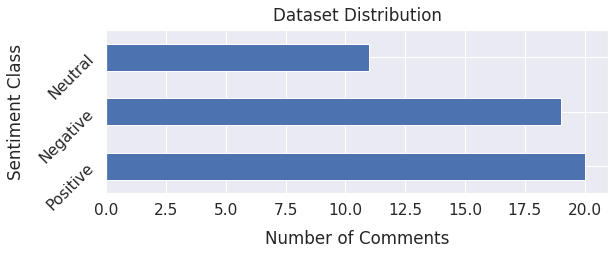

In [ ]:
sns.set(font_scale=1.4)
data['Tag'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

#data clean


In [ ]:
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [ ]:
data['cleaned'] = data['Comment'].apply(process_comments)  
sample_data=[2,6,7,9,21]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

Original:
 অরে বাবা, এই টা কোন পাগল???? 
Cleaned:
 অরে বাবা  এই টা কোন পাগল     
 Sentiment:--  Neutral 

Original:
 সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না করলেই নয় কি?আর এই সব ৪ থ গ্রেডের অভিনেত্রী অভিনেতা দের আপনারা জনপ্রিয় শব্দটা কেন ব্যবহার করছেন।এরা কি জনপ্রিয়? এরা কাস্টিং কাউচের সুযোগে অভিনেত্রী বা অভিনেতা। প্লিজ তেলবাজি নিউজ আর এদের ইম্পোরটেন্ট দেয়া বন্ধ করুন। 
Cleaned:
 সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না করলেই নয় কি আর এই সব ৪ থ গ্রেডের অভিনেত্রী অভিনেতা দের আপনারা জনপ্রিয় শব্দটা কেন ব্যবহার করছেন এরা কি জনপ্রিয়  এরা কাস্টিং কাউচের সুযোগে অভিনেত্রী বা অভিনেতা  প্লিজ তেলবাজি নিউজ আর এদের ইম্পোরটেন্ট দেয়া বন্ধ করুন  
 Sentiment:--  Negative 

Original:
 মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipayan PaulEku ChowdhuryKamrul HasanJony Jony 
Cleaned:
 মোহাম্মদ কফিল উদ্দীন মাহমুদ                                                             
 Sentiment:--  Positive 

Original:
 হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে। 
Cleaned:
 হিরো আলম তুমি এগিয়ে চলো  আমরা আছি 

In [ ]:
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 1 Small Reviews 
Total Reviews: 49


In [ ]:
data

,Comment,Tag,cleaned,length
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Negative,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,33
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Neutral,ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছি...,9
2,"অরে বাবা, এই টা কোন পাগল????",Neutral,অরে বাবা এই টা কোন পাগল,6
3,ক্যাপ্টেন অফ বাংলাদেশ,Positive,ক্যাপ্টেন অফ বাংলাদেশ,3
4,পটকা মাছ,Negative,পটকা মাছ,2
5,অন্যরকম .. ভালো লাগলো ..❤️,Positive,অন্যরকম ভালো লাগলো,3
6,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,Negative,সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...,45
7,মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...,Positive,মোহাম্মদ কফিল উদ্দীন মাহমুদ ...,4
8,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,Neutral,ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...,22
9,"হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে।",Positive,হিরো আলম তুমি এগিয়ে চলো আমরা আছি তোমার সাথে,9


In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Tag==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Negative
Number of Documents:19
Number of Words:485
Number of Unique Words:349
Most Frequent Words:

না	16
কি	10
আপনার	9
আপনি	8
করে	7
কে	5
এই	5
এসব	5
আর	4
সব	4

Class Name :  Positive
Number of Documents:19
Number of Words:216
Number of Unique Words:186
Most Frequent Words:

কি	4
সাথে	3
সেই	3
বলে	3
আর	3
এই	3
অনেক	3
আছে	3
ম্যাচের	3
জয়	2

Class Name :  Neutral
Number of Documents:11
Number of Words:298
Number of Unique Words:234
Most Frequent Words:

তার	7
এই	6
আর	5
কোন	3
থাকবে	3
তখন	3
কি	3
না	3
এক	3
সে	3
Total Number of Unique Words:681


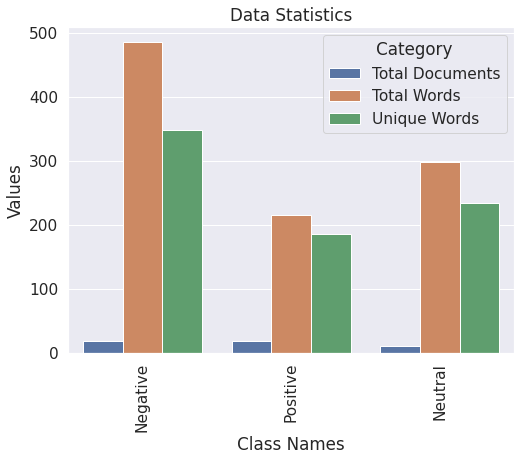

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=90);

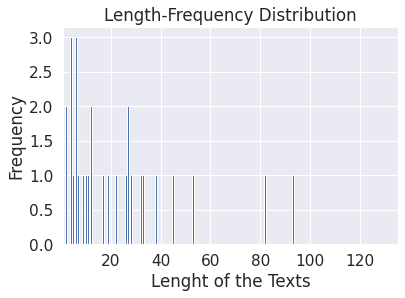

Maximum Length of a review: 141
Minimum Length of a review: 2
Average Length of a reviews: 26.0


In [ ]:
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [ ]:
neutral = dataset[dataset.Tag == 'Neutral']
negative = dataset[dataset.Tag == 'Negative'][:4000]
dataset = neutral.append(negative,ignore_index=True)
dataset.Tag.value_counts()

Negative    19
Neutral     11
Name: Tag, dtype: int64

In [ ]:
def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

In [ ]:
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)

Feature Size :======> 529

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 30 
	Training		 27 
	Test			 3


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

Feature Size :======> 1268

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 30 
	Training		 27 
	Test			 3
Feature Size :======> 1988

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 30 
	Training		 27 
	Test			 3


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     66.67       0.00     0.0      0.00          LR
1     66.67       0.00     0.0      0.00          DT
2     66.67       0.00     0.0      0.00          RF
3     66.67      50.00   100.0     66.67         MNB
4     33.33      33.33   100.0     50.00         KNN
5     66.67       0.00     0.0      0.00  Linear SVM
6     66.67       0.00     0.0      0.00     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by LR at = 66.67
Highest F1-Score achieved by MNB at = 66.67
Highest Precision Score achieved by MNB at = 50.0
Highest Recall Score achieved by MNB at = 100.0

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     66.67        0.0     0.0      0.00          LR
1     66.67       50.0   100.0     66.67          DT
2     66.67        0.0     0.0      0.00          RF
3     66.67     

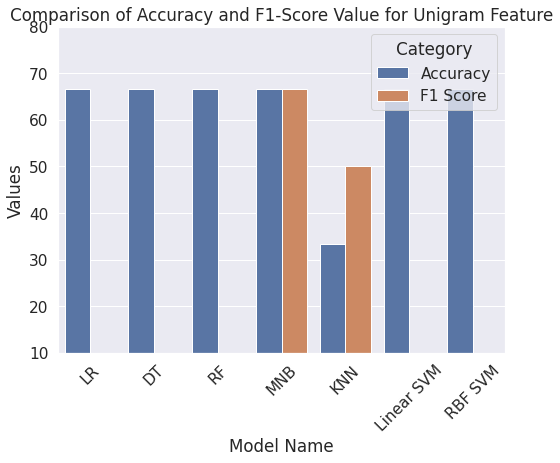

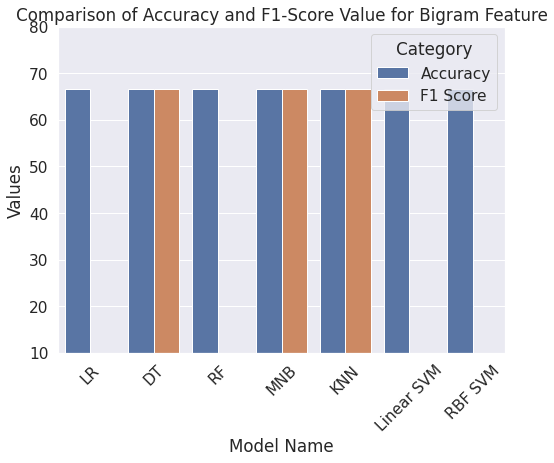

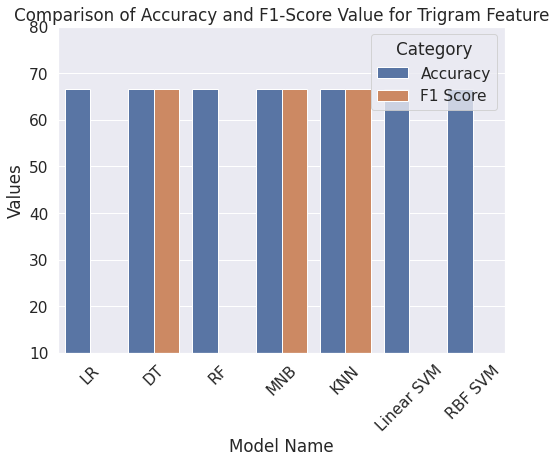

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);